In [1]:
%matplotlib inline
import os
import zipfile
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpim
from tensorflow.keras.preprocessing.image import img_to_array, load_img

Using TensorFlow backend.


In [2]:
"""local_zip = '/home/fabian/transportation.zip' #Zip File Location Path
zip_ref = zipfile.ZipFile(local_zip, 'r') # Read the local_zip
zip_ref.extractall('/home/fabian/') # All images will be located in /tmp/horse-or-man
zip_ref.close() # Close the File"""

"local_zip = '/home/fabian/transportation.zip' #Zip File Location Path\nzip_ref = zipfile.ZipFile(local_zip, 'r') # Read the local_zip\nzip_ref.extractall('/home/fabian/') # All images will be located in /tmp/horse-or-man\nzip_ref.close() # Close the File"

In [3]:
train_plane = os.path.join('/home/fabian/dataset/transportation/plane')
train_car = os.path.join('/home/fabian/dataset/transportation/car')

validation_plane = os.path.join('/home/fabian/dataset/transval/plane')
validation_car = os.path.join('/home/fabian/dataset/transval/car')

In [4]:
train_plane_names = os.listdir(train_plane)
print(train_plane_names[:10])

train_car_names = os.listdir(train_car)
print(train_car_names[:10])

['alitalia1-700x467.png', '20200424-virgin-australia_4A8E536BCC6E4836A93C4076691909BD.jpg', 'b-17_sentimental_journey_204.jpg', 'Aeromexico-Boeing-787-Faces-Speed-Problems.jpg', 'Russian_Jets_Alaska_86236.jpg-a03e8.jpg', '19-July-Super-Hornet-625.png', 'images33.jpg', 'hqdefault.jpg', '23bc9965180b35fd007919c289e608d3.jpg', '_110649407_mediaitem110649406.jpg']
['porsche-cayenne.jpg', 'model-s-range-desktop.png', '2020HYC010001_640_01.png', '945812.jpg', 'asset.MQ6.0.20190822163300.jpeg', '757610.jpg', '5e8b34a9883a9-bmw-eastern-region_20190930123821.png', '2019_Hyundai_Elantra_Limited_28AD_facelift29_front_NYIAS_2019.jpg', '2021-genesis-gv80-chicago-01.jpg', 'hyundai-palisade-menu.png']


In [5]:
print('total training plane images:', len(os.listdir(train_plane)))
print('total training car images:', len(os.listdir(train_car)))

total training plane images: 827
total training car images: 943


In [6]:
nrows = 4
ncols = 4

pic_index = 0

In [7]:
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 100
next_plane = [os.path.join(train_plane, fname) for fname in train_plane[pic_index-8:pic_index]]
next_car = [os.path.join(train_car, fname) for fname in train_car[pic_index-8:pic_index]]

next_plane
next_car

[]

<Figure size 1152x1152 with 0 Axes>

In [8]:
for i, img_path in enumerate(next_plane+next_car):
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') 

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid') 
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

In [31]:
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy']) 

In [32]:
train_datagen = image.ImageDataGenerator(rescale=1/255)
validation_datagen = image.ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
        '/home/fabian/dataset/transportation/',  
        target_size=(300, 300),  
        batch_size=50,
        class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
        '/home/fabian/dataset/transval/',
        target_size=(300, 300), 
        batch_size=10,
        class_mode='binary')

Found 3528 images belonging to 2 classes.
Found 165 images belonging to 2 classes.


In [34]:
history = model.fit(train_generator, steps_per_epoch=20, epochs=50, verbose=1, validation_data = validation_generator,
      validation_steps=8)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 20 steps, validate for 8 steps
Epoch 1/50
20/20 [==============================] - 36s 2s/step - loss: 0.2970 - accuracy: 0.8820 - val_loss: 0.3213 - val_accuracy: 0.8625
Epoch 2/50
20/20 [==============================] - 35s 2s/step - loss: 0.2438 - accuracy: 0.9040 - val_loss: 0.2940 - val_accuracy: 0.8625
Epoch 3/50
20/20 [==============================] - 36s 2s/step - loss: 0.1945 - accuracy: 0.9190 - val_loss: 0.2848 - val_accuracy: 0.8750
Epoch 4/50
20/20 [==============================] - 33s 2s/step - loss: 0.2340 - accuracy: 0.9080 - val_loss: 0.2501 - val_accuracy: 0.8625
Epoch 5/50
20/20 [==============================] - 31s 2s/step - loss: 0.2253 - accuracy: 0.9140 - val_loss: 0.2167 - val_accuracy: 0.9000
Epoch 6/50
20/20 [==============================] - 33s 2s/step - loss: 0.2118 - accuracy: 0.9210 - val_loss: 0.2455 - val_accuracy: 0.9000
Epoch 7/50
20/20 [==============================] - 33s 2s/step - los

In [35]:
import numpy as np
from tensorflow import keras
from keras.preprocessing import image

path = '/home/fabian/car.jpg'
img = image.load_img(path, target_size=(300,300,3))
x = image.img_to_array(img)
    
x=np.expand_dims(x, axis=0)
images = np.vstack([x])

classes = model.predict(images, batch_size=10)

print(classes[0])

if classes[0]>0:
    print(path + " is a plane")
else:
    print(path + " is a car")

[0.]
/home/fabian/car.jpg is a car


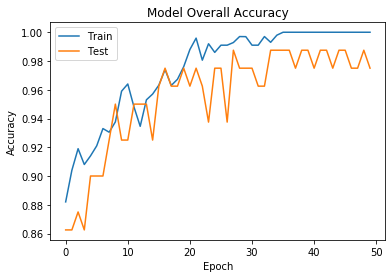

In [36]:
# Graphing Overall Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Overall Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

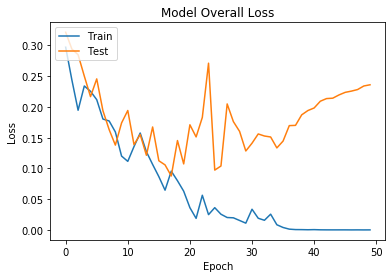

In [37]:
# Graphing Overall Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Overall Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()